In [1]:
from sklearn import datasets, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [4]:
x_train.shape[0],x_test.shape[0],x_train.shape

(60000, 10000, (60000, 784))

In [5]:
n_digits = 10
ks = list(range(1, 11)) + [12, 15, 20]
scores = []
scores_kmeans = []
ks

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20]

In [6]:
for k in ks:
    # naive
    x_train_k, _, y_train_k, _ = train_test_split(x_train, y_train, train_size=n_digits * k, stratify=y_train, random_state=42)
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(x_train_k, y_train_k)
    scores.append(neigh.score(x_test, y_test))
    # k-means
    x_train_kmeans = []
    y_train_kmeans = []
    for i in range(n_digits):
        x_train_kmeans.append(KMeans(n_clusters=k, random_state=0, n_init=10).fit(x_train[y_train == i]).cluster_centers_)
        y_train_kmeans.extend([i] * k)
    x_train_kmeans = np.concatenate(x_train_kmeans)
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(x_train_kmeans, y_train_kmeans)
    scores_kmeans.append(neigh.score(x_test, y_test))

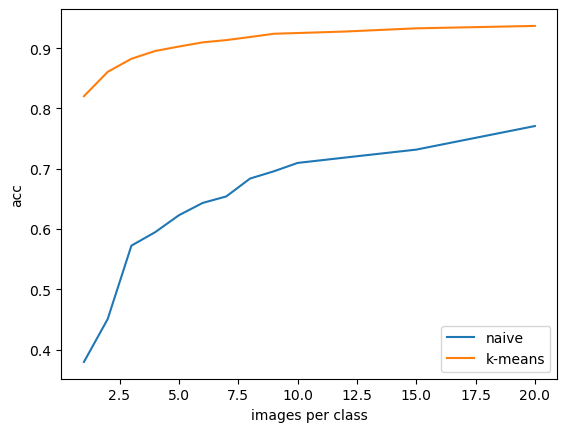

In [7]:
plt.plot(ks, scores, label='naive')
plt.plot(ks, scores_kmeans, label='k-means')
plt.ylabel('acc')
plt.xlabel('images per class')
plt.legend()